In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import os

In [4]:
feature_path = '../data/features_180310.csv'
df = pd.read_csv(feature_path)
df.head(5)

,zip,price,sqft,bedrooms,sale_type,ZIPCODE,total_parks,total_park_area,total_lines,total_stations,...,2010 Total Acres,Number,2010,2000,total_bus,Cigarette Retail Dealer,Newsstand,Laundries,Laundry,Sidewalk Cafe
0,10001,2488000.0,1536.0,2.0,Condo For Sale,10001.0,33.0,365798.032282,22.0,7.0,...,2664.76,225.147059,117792.0,110137.0,498.0,93.0,23.0,14.0,2.0,9.0
1,10001,5750000.0,2146.0,3.0,Condo For Sale,10001.0,33.0,365798.032282,22.0,7.0,...,2664.76,225.147059,117792.0,110137.0,498.0,93.0,23.0,14.0,2.0,9.0
2,10001,2850000.0,2700.0,3.0,Condo For Sale,10001.0,33.0,365798.032282,22.0,7.0,...,2664.76,225.147059,117792.0,110137.0,498.0,93.0,23.0,14.0,2.0,9.0
3,10001,13880000.0,3364.0,4.0,Condo For Sale,10001.0,33.0,365798.032282,22.0,7.0,...,2664.76,225.147059,117792.0,110137.0,498.0,93.0,23.0,14.0,2.0,9.0
4,10001,9255000.0,2566.0,3.0,Condo For Sale,10001.0,33.0,365798.032282,22.0,7.0,...,2664.76,225.147059,117792.0,110137.0,498.0,93.0,23.0,14.0,2.0,9.0


In [5]:
print(df.shape)
df.describe()

(10150, 45)


,zip,price,sqft,bedrooms,ZIPCODE,total_parks,total_park_area,total_lines,total_stations,"$1 under $25,000",...,2010 Total Acres,Number,2010,2000,total_bus,Cigarette Retail Dealer,Newsstand,Laundries,Laundry,Sidewalk Cafe
count,10150.000000,1.015000e+04,10150.000000,10150.000000,10150.000000,10150.000000,1.015000e+04,10150.000000,10150.000000,10150.000000,...,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000
mean,10753.017537,2.579890e+06,1993.838424,3.113103,10753.017537,74.181379,5.011041e+06,7.302266,3.526798,9700.714286,...,3411.191719,125.884989,159254.697044,155228.787882,333.111330,52.552217,4.638818,28.278621,14.451724,16.223941
std,634.169989,4.984904e+06,2592.840923,2.352605,634.169989,63.438396,8.168317e+06,6.229530,2.765870,7404.710327,...,1799.469083,247.301247,85232.604656,84547.476577,148.415305,25.331091,6.571704,15.197274,11.013262,21.443393
min,10001.000000,5.300000e+03,1.000000,0.000000,10001.000000,1.000000,2.201017e+03,0.000000,0.000000,300.000000,...,149.240000,-273.025641,6754.000000,4140.000000,11.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,10022.000000,6.790000e+05,935.000000,2.000000,10022.000000,32.000000,4.181331e+05,3.000000,2.000000,4460.000000,...,2214.900000,0.608696,108651.000000,102439.000000,228.000000,33.000000,0.000000,17.000000,7.000000,0.000000
50%,11210.000000,1.195000e+06,1452.000000,3.000000,11210.000000,57.000000,1.417790e+06,6.000000,3.000000,6700.000000,...,2838.660000,91.263158,146370.000000,146272.000000,321.000000,51.000000,1.000000,28.000000,11.000000,6.000000
75%,11354.000000,2.356750e+06,2400.000000,4.000000,11354.000000,107.000000,6.200279e+06,11.000000,5.000000,14670.000000,...,4314.390000,204.977273,180048.000000,179945.000000,444.000000,66.000000,9.000000,38.000000,20.000000,27.000000
max,11436.000000,8.500000e+07,123271.000000,53.000000,11436.000000,433.000000,4.493723e+07,25.000000,15.000000,37090.000000,...,12168.050000,1593.750000,452536.000000,447362.000000,692.000000,141.000000,28.000000,68.000000,61.000000,84.000000


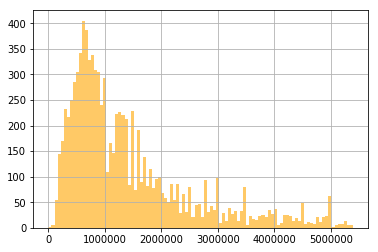

In [6]:
import matplotlib.pyplot as plt

df['price'][df['price'] < df['price'].quantile(.9)]\
            .hist(color='orange', alpha=0.6, bins=100)
plt.show()

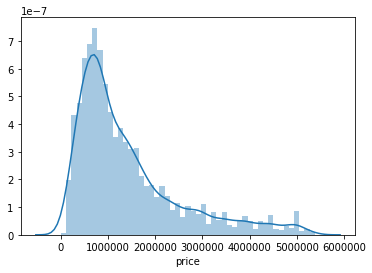

In [7]:
import seaborn as sns
sns.distplot(df['price'][df['price'] < df['price'].quantile(.9)]);

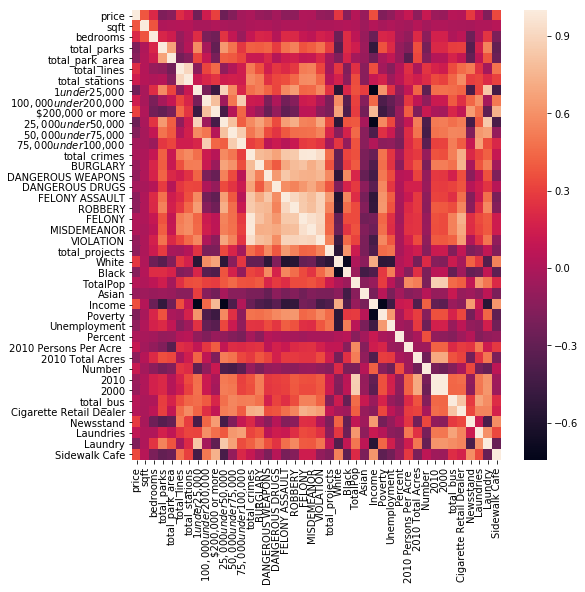

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

fig, ax = plt.subplots()
fig.set_size_inches(8.27, 8.27)
numeric = df.drop(['zip','ZIPCODE'],axis=1)
numeric = numeric.select_dtypes(include=numerics)
corr = numeric.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,ax=ax)

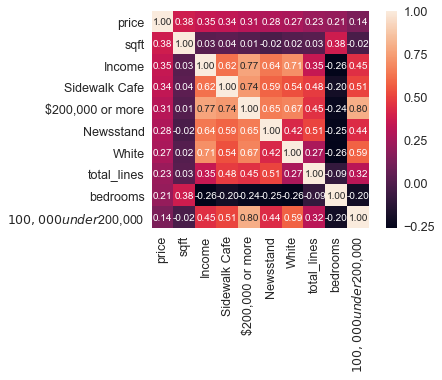

In [9]:
k = 10
cols = corr.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [10]:
print(df.shape)

(10150, 45)


In [11]:
nonnumeric = df.select_dtypes(exclude=numerics)

In [12]:
nonnumeric.columns

Index(['sale_type'], dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
lbl.fit(df['sale_type'].values)
df['s_type'] = lbl.transform(df['sale_type'].values)

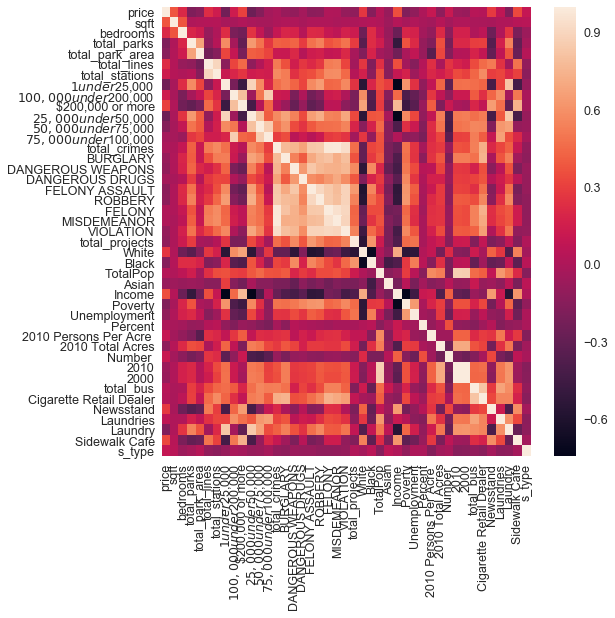

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(8.27, 8.27)
numeric = df.drop(['zip','ZIPCODE'],axis=1)
numeric = numeric.select_dtypes(include=numerics)
corr = numeric.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,ax=ax)

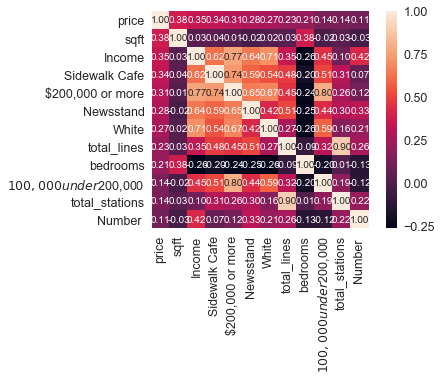

In [15]:
k = 12
cols = corr.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()